# DATA CLEANING and PRE_PROCESSING

## Introdução

Depois da extração das características necessárias para o treino dos modelos de classificação, neste documento, iremos tratar da limpeza e pré-processamento dos dados, assegurando assim uma compatibilidade e qualidade dos mesmos para obtermos algoritmos de aprendizagem computacional eficazes



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pylidc_df = pd.read_csv('pylidc_features.csv')
pyradiomics_df = pd.read_csv('pyradiomics_features.csv')

Malignidade: [1 2 3 4 5]
Número de Instâncias: [1020 1580 2606  962  691]


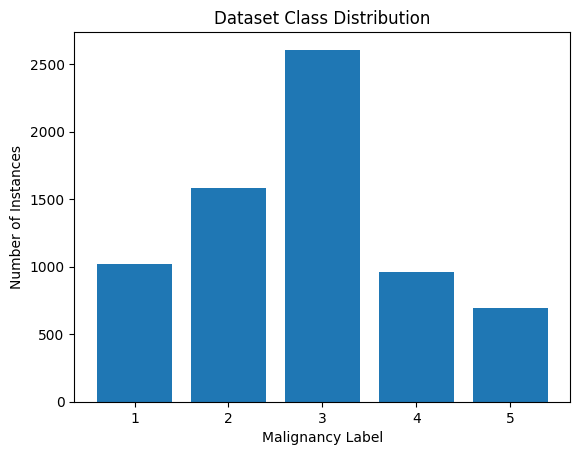

In [2]:
unique_label, count = np.unique(pylidc_df.malignancy, return_counts = True)
plt.bar(unique_label, count)
plt.xlabel('Malignancy Label')
plt.ylabel('Number of Instances')
plt.title('Dataset Class Distribution')

print(f'Malignidade: {unique_label}\nNúmero de Instâncias: {count}')

## Problema de Classificação Binário

De forma a tornar o nosso pr

Segundo a documentação do pylidc, a "malignancy" de um nodulo está classificada de acordo com a seguinte escala: 

malignancy-> int, range = {1,2,3,4,5} – Subjective assessment of the likelihood of malignancy, assuming the scan originated from a 60-year-old male smoker.
* 1 ‘Highly Unlikely’
* 2 ‘Moderately Unlikely’
* 3 ‘Indeterminate’
* 4 ‘Moderately Suspicious’
* 5 ‘Highly Suspicious’

Então decidimos agrupar [1,2] = 0 indicando não maligno; e [4,5] = 1 como maligno

Os indeterminados [3] decidimos ignorar pois iriamos estar a criar possivel ruido e dados com classificação errada ao atribuir 1 ou 0

In [3]:
for j in range (len(pylidc_df)):
    if pylidc_df.at[j, 'malignancy'] == 4 or pylidc_df.at[j, 'malignancy'] == 5:
        pylidc_df.at[j, 'malignancy'] = 1
    elif pylidc_df.at[j, 'malignancy'] == 1 or pylidc_df.at[j, 'malignancy'] == 2:
        pylidc_df.at[j, 'malignancy'] = 0

Malignidade: [0 1 3]
Número de Instâncias: [2600 1653 2606]


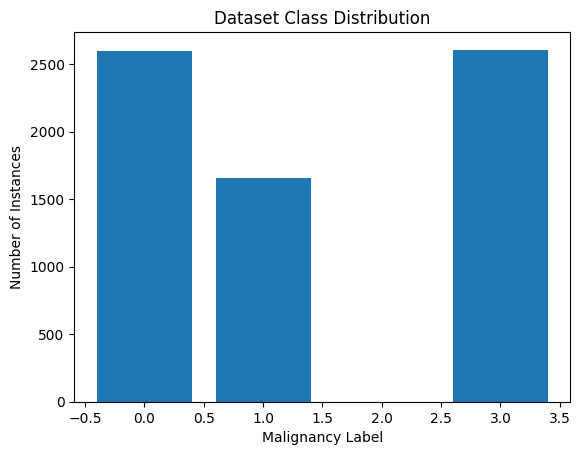

In [4]:
unique_label, count = np.unique(pylidc_df.malignancy, return_counts = True)
plt.bar(unique_label, count)
plt.xlabel('Malignancy Label')
plt.ylabel('Number of Instances')
plt.title('Dataset Class Distribution')

print(f'Malignidade: {unique_label}\nNúmero de Instâncias: {count}')

### Remoção dos Casos Indeterminados

Malignidade: [0 1]
Número de Instâncias: [2600 1653]


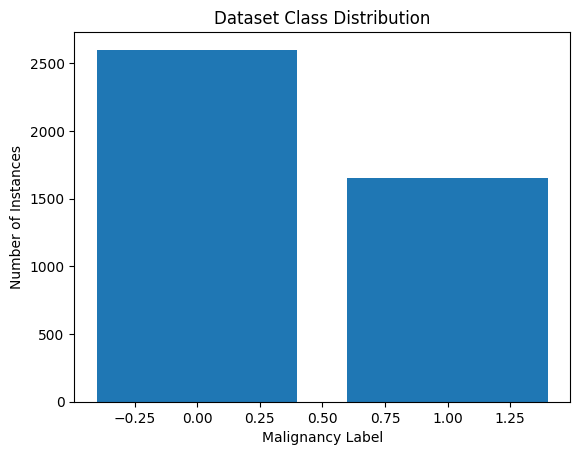

In [5]:
pylidc_df = pylidc_df[pylidc_df['malignancy'] != 3]

unique_label, count = np.unique(pylidc_df.malignancy, return_counts = True)
plt.bar(unique_label, count)
plt.xlabel('Malignancy Label')
plt.ylabel('Number of Instances')
plt.title('Dataset Class Distribution')

print(f'Malignidade: {unique_label}\nNúmero de Instâncias: {count}')

## Junção dos Datasets

Depois de transformar a variável objetivo ('malignancy') em formato binário, o próximo passo é juntar ambos os datasets das características ('pyradiomics_df' e 'pylidc_df').

Primeiramente, vamos analisar o formato de cada um dos dataframes:

In [6]:
print(f'Formato Pylidc: {pylidc_df.shape}\nFormato Pyradiomics:{pyradiomics_df.shape}')

Formato Pylidc: (4253, 15)
Formato Pyradiomics:(6859, 108)


Em seguida, iremos juntar ambos os datasets utilizando o método 'merge' do pandas:

In [7]:
final_df = pyradiomics_df.merge(pylidc_df, left_on = 'case_id', right_on = 'case_id')
print(f'Formato do Dataset Final: {final_df.shape}')
final_df.head()

Formato do Dataset Final: (4253, 122)


,case_id,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy
0,LIDC-IDRI-0001_12_84,0.971629,0.246297,8.235017,33.435268,48.010416,47.010637,38.013156,48.020829,5864.541667,...,6,3,3,3,4,5,32.205888,2801.428431,7869.369507,1
1,LIDC-IDRI-0001_12_85,0.933907,0.213370,6.940565,32.528335,39.051248,45.803930,40.000000,46.904158,4556.708333,...,6,4,4,5,5,5,33.188692,2198.454852,6146.438599,1
2,LIDC-IDRI-0001_12_86,0.971849,0.237372,7.523759,31.696116,38.013156,44.045431,35.128336,47.675990,4912.708333,...,6,3,2,3,3,5,31.959332,2392.704188,6594.474792,1
3,LIDC-IDRI-0001_12_87,0.944220,0.253654,8.264833,32.583138,45.011110,46.065171,35.014283,51.303021,5434.500000,...,6,5,4,1,5,4,33.669337,2573.278820,7348.411560,1
4,LIDC-IDRI-0002_13_88,0.751149,0.548785,18.996136,34.614919,34.176015,45.177428,48.093659,51.176166,10245.750000,...,6,5,1,1,1,1,30.023172,2880.758652,6576.900681,1


## Remoção de Colunas

Remoção de colunas que contenham valores constantes ou nulos:

In [8]:
# Remoção de colunas em que o valor é constante (igual em todas as linhas)
for column in final_df.columns:
    if len(final_df[column].unique()) == 1:
        final_df = final_df.drop(columns=column)

# Remoção de colunas com valores nulos
for column in final_df.columns:
    na_count = final_df[column].isnull().sum()
    if na_count >= 1:
        final_df = final_df.drop(columns=column)

Depois de removidas as colunas, analisamos o 'final_df' novamente:

Concluimos que não existia nenhum valor nulo nem atributos constantes

In [9]:
final_df.shape

(4253, 122)

In [10]:
final_df.dtypes.value_counts()

float64    112
int64        9
object       1
Name: count, dtype: int64

In [11]:
df_groupby_dtypes = final_df.columns.to_series().groupby(final_df.dtypes).groups

for key, value in df_groupby_dtypes.items():
    if key == 'object':
        print(value)

Index(['case_id'], dtype='object')


## Colunas com Correlação Baixa

Eliminamos colunas com uma correlação com a 'malignancy' menor que 20% (correlação < 0.2), assegurando assim que o dataset utilizado para treinar os modelos contém apenas as características com maior informação

In [12]:
index = final_df[['case_id']]
features = final_df.drop(columns = ['case_id'])

In [13]:
features_correlation = features.corr()['malignancy']
feat_to_eliminate = features_correlation[abs(features_correlation) < 0.2].index
max_information_df = features.drop(columns = feat_to_eliminate)
max_information_df.shape

(4253, 76)

In [14]:
max_information_df

,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,...,original_ngtdm_Strength,subtlety,calcification,margin,lobulation,spiculation,diameter,surface_area,volume,malignancy
0,8.235017,33.435268,48.010416,47.010637,38.013156,48.020829,5864.541667,32.486664,0.499590,3147.937609,...,1.462896,5,6,3,3,4,32.205888,2801.428431,7869.369507,1
1,6.940565,32.528335,39.051248,45.803930,40.000000,46.904158,4556.708333,30.378450,0.526157,2526.210130,...,1.826502,5,6,4,5,5,33.188692,2198.454852,6146.438599,1
2,7.523759,31.696116,38.013156,44.045431,35.128336,47.675990,4912.708333,30.803832,0.522619,2674.113302,...,1.433190,5,6,2,3,3,31.959332,2392.704188,6594.474792,1
3,8.264833,32.583138,45.011110,46.065171,35.014283,51.303021,5434.500000,30.765644,0.527546,2833.545444,...,1.158140,5,6,4,1,5,33.669337,2573.278820,7348.411560,1
4,18.996136,34.614919,34.176015,45.177428,48.093659,51.176166,10245.750000,26.000948,0.508842,4483.292315,...,0.985589,2,6,1,1,1,30.023172,2880.758652,6576.900681,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4.868688,21.597968,26.019224,25.317978,21.023796,27.000000,1101.458333,16.835357,0.534311,965.314542,...,4.567470,5,6,4,2,3,21.909849,1121.939102,2322.662354,1
4249,1.709531,10.977556,13.000000,13.341664,10.049876,13.341664,93.458333,8.036551,0.553436,179.954312,...,9.509842,1,6,2,1,1,10.346859,159.437117,132.646850,0
4250,2.252978,9.621327,11.045361,10.049876,7.071068,11.090537,83.083333,6.304004,0.628999,146.389674,...,10.657922,4,6,4,2,2,7.262603,151.242954,125.857838,0
4251,2.345017,13.596555,13.152946,13.601471,10.049876,14.071247,195.250000,9.406281,0.602894,269.962789,...,8.661927,4,6,5,1,1,10.522030,252.306740,258.504689,0


In [15]:
final_df = pd.concat([index, max_information_df], axis = 1)
final_df.shape

(4253, 77)

In [19]:
final_df.to_csv('pre_bins_and_one-hot_encode_final_features.csv', sep = ',', index = False)

### Tornar os dados em binários
Como se trata de um problema de classificação binário vamos tornar os dados em binário, isto é:
- Os valores float vao ser transformados em bins e depois aplicaremos one-hot encoding
- Os valores inteiros são classes que variam entre [1,5] logo não precisamos de criar bins, apenas fazer one-hot encoding

In [20]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder


# vamos fazer bins dos float iremos usar a regra de Rice -> 2 * n^(1/3)
nbins = int(2 * (len(final_df) ** (1/3)))
discretizer = KBinsDiscretizer(n_bins=nbins, encode='ordinal', strategy='kmeans')

encoded_columns = []
encoder = OneHotEncoder(sparse_output=False, drop=None)

for column in final_df.columns:
    if column =="case_id" or column == "malignancy": continue # nao precisamos de tratar dos ids e das classificacoes
    
    if type(final_df[column][0]) == np.float64: # vamos fazer bins dos float        
        final_df[column] = discretizer.fit_transform(final_df[[column]])
     
    # apos os bins fazemos one-hot enconde
    encoded_col = encoder.fit_transform(final_df[[column]])
    
    encoded_df = pd.DataFrame(encoded_col, columns=[f"{column}_{i}" for i in range(encoded_col.shape[1])])
    encoded_columns.append(encoded_df)
 
# juntar os case_id e a classificacao com o novo df encoded
final_df_encoded = pd.concat([final_df[['case_id', 'malignancy']], *encoded_columns], axis=1)

In [21]:
# df apos bins 
final_df.head()

,case_id,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,...,original_ngtdm_Strength,subtlety,calcification,margin,lobulation,spiculation,diameter,surface_area,volume,malignancy
0,LIDC-IDRI-0001_12_84,12.0,16.0,23.0,19.0,15.0,17.0,15.0,23.0,11.0,...,0.0,5,6,3,3,4,17.0,14.0,17.0,1
1,LIDC-IDRI-0001_12_85,11.0,15.0,19.0,18.0,16.0,17.0,13.0,21.0,12.0,...,0.0,5,6,4,5,5,17.0,11.0,15.0,1
2,LIDC-IDRI-0001_12_86,12.0,15.0,19.0,18.0,14.0,17.0,14.0,21.0,12.0,...,0.0,5,6,2,3,3,17.0,12.0,15.0,1
3,LIDC-IDRI-0001_12_87,12.0,15.0,22.0,19.0,14.0,18.0,15.0,21.0,12.0,...,0.0,5,6,4,1,5,18.0,13.0,16.0,1
4,LIDC-IDRI-0002_13_88,22.0,16.0,17.0,18.0,21.0,18.0,20.0,18.0,11.0,...,0.0,2,6,1,1,1,16.0,15.0,15.0,1


In [22]:
# df final apos bins e one-hot encode
final_df_encoded.head()

,case_id,malignancy,original_shape_LeastAxisLength_0,original_shape_LeastAxisLength_1,original_shape_LeastAxisLength_2,original_shape_LeastAxisLength_3,original_shape_LeastAxisLength_4,original_shape_LeastAxisLength_5,original_shape_LeastAxisLength_6,original_shape_LeastAxisLength_7,...,volume_22,volume_23,volume_24,volume_25,volume_26,volume_27,volume_28,volume_29,volume_30,volume_31
0,LIDC-IDRI-0001_12_84,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LIDC-IDRI-0001_12_85,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,LIDC-IDRI-0001_12_86,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LIDC-IDRI-0001_12_87,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,LIDC-IDRI-0002_13_88,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
for col in final_df_encoded.columns:
    if len(final_df_encoded[col].unique()) != 2: # true apenas para atributos nao binarios (esperado apenas case_id)
        print(f'Nao binario: {col}')

Nao binario: case_id


## Conclusão

In [104]:
final_df_encoded.to_csv('final_features.csv', sep = ',', index = False)